In [1]:
import numpy as np

class Perceptron(object) :
    """パーセプトロンの分類器
    パラメータ
    ------------
    eta: float
        学習率（0.0~1.0）
    n_iter : int
        トレーニングデータのトレーニング回数
        
    属性
    -----------
    w_ : 1次元配列
        適合後の重み
    errors_ : リスト
        各エポックでの誤分類数
    """
    
    def __init__(self, eta=0.01, n_iter=10) :
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y) :
        """トレーニングデータに適合させる（重みの更新）
        パラメータ
        -------------
        X : {配列のようなデータ構造}, shape = [n_samples, n_features]
        　　　　トレーニングデータ
        y :  {配列のようなデータ構造}, shape = [n_samples]
            目的変数
            
        戻り値
        -------------
        self : object
        """
        self.w_ = np.zeros(1 + X.shape[1]) #トレーニングデータの特徴量+1（閾値）のサイズで初期化
        self.errors_ = []
        
        for _ in range(self.n_iter) : # トレーニング回数分トレーニングデータを反復
            errors = 0
            for xi, target in zip(X, y) : # 各サンプルで重みを更新
                # 重みw1, ... , wm の更新
                # Δ wj = η( y( i)- y( i)) xj( i) ( j = 1, .. , m)
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                # 重み w0 の更新： Δ w 0 = η( y( i)- y( i))
                self.w_[0] += update
                # 重みの更新が0でない場合は誤分類としてカウント
                errors += int(update != 0.0)
            # 反復回数ごとの誤差を格納
            self.errors_.append(errors)
        return self
    
    def net_input(self, X) :
        """総入力を計算"""
        return np.dot(X, self.w_[1:]) + self.w_[0] # 入力ベクトル * 重み　- θ
    
    def predict(self, X) :
        """1ステップ後のクラスラベルを返す"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [2]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


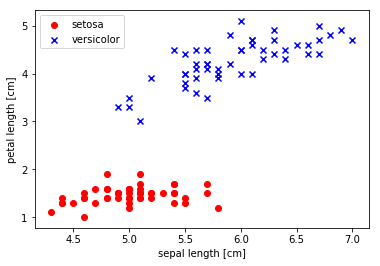

In [6]:
import matplotlib.pyplot as plt
import numpy as np
# 1-100行目の目的変数の抽出
y = df.iloc[0:100, 4].values
# Iris-setosaを-1, Iris-versicolorを1に変換
y = np.where(y == 'Iris-setosa', -1, 1)
# 1-100行目の1, 3列目の抽出
X = df.iloc[0:100, [0, 2]].values
# 品種setosaのプロット（赤のo）
plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
# 品種versicolorのプロット（青のx）
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='x', label='versicolor')
# 軸のラベルの設定
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
# 凡例の設定（左上に配置）
plt.legend(loc='upper left')
# 図の表示
plt.show()

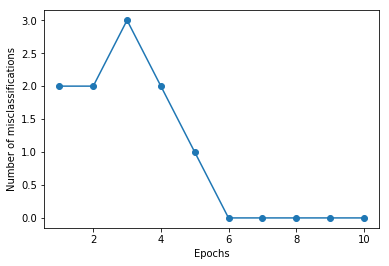

In [8]:
# パーセプトロンのオブジェクトの生成（インスタンス化）
ppn = Perceptron(eta=0.1, n_iter=10)
# トレーニングデータのモデルへの適合
ppn.fit(X, y)
# エポックと誤分類誤差の関係の折れ線グラフをプロット
plt.plot(range(1, len(ppn.errors_ ) + 1), ppn.errors_, marker='o')
# 軸のラベルの設定
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [10]:
# 決定境界のプロット
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02) :
    # マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # 決定領域のプロット
    # x1はsepal length, x2はpetal length
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    # 各特徴量を1次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # 予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    # グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # クラスごとにサンプルをプロット
    for idx, c1 in enumerate(np.unique(y)) :
        plt.scatter(x=X[y == c1, 0], y=X[y == c1, 1], alpha=0.8, c=cmap(idx),
        marker=markers[idx], label=c1)

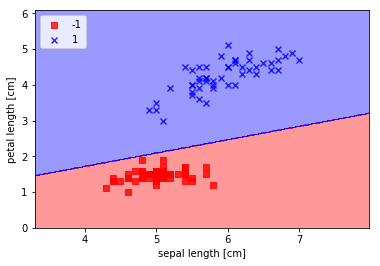

In [11]:
# 決定境界のプロット
plot_decision_regions(X, y, classifier=ppn)
# 軸のラベルの設定
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
# 凡例の設定（左上に配置）
plt.legend(loc='upper left')
# 図の表示
plt.show()